In [28]:
# Dependencies and Setup
import pandas as pd

import warnings
warnings.filterwarnings('ignore')
from sqlalchemy import create_engine

# File to Load (Remember to Change These)
file_to_load = "../Resources/charts.csv"

# Read Purchasing File and store into Pandas data frame
billboard_df = pd.read_csv(file_to_load)

In [29]:
#billboard_df.dtypes
billboard_df

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,2021-11-06,1,Easy On Me,Adele,1.0,1,3
1,2021-11-06,2,Stay,The Kid LAROI & Justin Bieber,2.0,1,16
2,2021-11-06,3,Industry Baby,Lil Nas X & Jack Harlow,3.0,1,14
3,2021-11-06,4,Fancy Like,Walker Hayes,4.0,3,19
4,2021-11-06,5,Bad Habits,Ed Sheeran,5.0,2,18
...,...,...,...,...,...,...,...
330082,1958-08-04,96,Over And Over,Thurston Harris,NaN,96,1
330083,1958-08-04,97,I Believe In You,Robert & Johnny,NaN,97,1
330084,1958-08-04,98,Little Serenade,The Ames Brothers,NaN,98,1
330085,1958-08-04,99,I'll Get By (As Long As I Have You),Billy Williams,NaN,99,1


In [30]:
billboard_new_df = billboard_df.copy()

#split the date by the - by year, month, day 
billboard_new_df[['Year', 'Month', 'Day']] = billboard_df['date'].str.split('-', expand=True)


#delete unessary columns 'date' and reorg the column order and reset index 
del billboard_new_df['date']

del billboard_new_df['last-week']

billboard_new_df.reset_index
billboard_new_df

,rank,song,artist,peak-rank,weeks-on-board,Year,Month,Day
0,1,Easy On Me,Adele,1,3,2021,11,06
1,2,Stay,The Kid LAROI & Justin Bieber,1,16,2021,11,06
2,3,Industry Baby,Lil Nas X & Jack Harlow,1,14,2021,11,06
3,4,Fancy Like,Walker Hayes,3,19,2021,11,06
4,5,Bad Habits,Ed Sheeran,2,18,2021,11,06
...,...,...,...,...,...,...,...,...
330082,96,Over And Over,Thurston Harris,96,1,1958,08,04
330083,97,I Believe In You,Robert & Johnny,97,1,1958,08,04
330084,98,Little Serenade,The Ames Brothers,98,1,1958,08,04
330085,99,I'll Get By (As Long As I Have You),Billy Williams,99,1,1958,08,04


In [31]:
#rename the columns so they are upper case
billboard_new_df = billboard_new_df.rename(columns={'rank': 'Rank', 'song': 'Song', 'artist': 'Artist', 'peak-rank': 'Peak-Rank', 'weeks-on-board': 'Weeks-On-Board'})

#reorder columns 
billboard_new_df_update = billboard_new_df[['Rank', 'Song', 'Artist','Peak-Rank', 'Weeks-On-Board','Month', 'Day', 'Year']]
# billboard_new_df = billboard_df.reset_index()
billboard_new_df_update

#fill in NaN on entire database 
billboard_new_df_update.fillna(0)


#turn month, day, year into an integer from an object 
billboard_new_df_update[['Month', 'Day', 'Year']] = billboard_new_df_update[['Month', 'Day', 'Year']].astype('int')


In [32]:


billboard_new_df_update.dtypes

Rank               int64
Song              object
Artist            object
Peak-Rank          int64
Weeks-On-Board     int64
Month              int64
Day                int64
Year               int64
dtype: object

In [33]:

#filter for since the year 2020 
billboard_filtered_df = billboard_new_df_update.loc[(billboard_new_df_update['Year']>=2020) & (billboard_new_df_update['Rank'] <= 10)]



billboard_filtered_df.reset_index
billboard_filtered_df


,Rank,Song,Artist,Peak-Rank,Weeks-On-Board,Month,Day,Year
0,1,Easy On Me,Adele,1,3,11,6,2021
1,2,Stay,The Kid LAROI & Justin Bieber,1,16,11,6,2021
2,3,Industry Baby,Lil Nas X & Jack Harlow,1,14,11,6,2021
3,4,Fancy Like,Walker Hayes,3,19,11,6,2021
4,5,Bad Habits,Ed Sheeran,2,18,11,6,2021
...,...,...,...,...,...,...,...,...
9605,6,Roxanne,Arizona Zervas,4,8,1,4,2020
9606,7,It's The Most Wonderful Time Of The Year,Andy Williams,7,15,1,4,2020
9607,8,Someone You Loved,Lewis Capaldi,1,33,1,4,2020
9608,9,Memories,Maroon 5,4,14,1,4,2020


In [34]:
billboard_filtered_df

engine = create_engine("sqlite:///Country.sqlite")
billboard_filtered_df.to_sql(name="country_USA", con=engine, if_exists="append", index=False)
pd.read_sql_query("select * from country_USA", con=engine).head()

,Rank,Song,Artist,Peak-Rank,Weeks-On-Board,Month,Day,Year
0,1,Easy On Me,Adele,1,3,11,6,2021
1,2,Stay,The Kid LAROI & Justin Bieber,1,16,11,6,2021
2,3,Industry Baby,Lil Nas X & Jack Harlow,1,14,11,6,2021
3,4,Fancy Like,Walker Hayes,3,19,11,6,2021
4,5,Bad Habits,Ed Sheeran,2,18,11,6,2021


F_onewayResult(statistic=8.372316899752521, pvalue=0.0038449662044102205)

F_onewayResult(statistic=0.25605635843788166, pvalue=0.6128901125234607)

F_onewayResult(statistic=5.284519307076588, pvalue=0.021603419137369635)

             Multiple Comparison of Means - Tukey HSD, FWER=0.05             
       group1              group2       meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------------------
     Dallas Cowboys     New York Giants  -0.0314    0.9 -0.3694 0.3065  False
     Dallas Cowboys Philadelphia Eagles   0.0814    0.9 -0.2473 0.4101  False
     Dallas Cowboys Washington Redskins  -0.0613    0.9  -0.396 0.2733  False
    New York Giants Philadelphia Eagles   0.1129  0.803 -0.2249 0.4506  False
    New York Giants Washington Redskins  -0.0299    0.9 -0.3735 0.3137  False
Philadelphia Eagles Washington Redskins  -0.1427 0.6694 -0.4772 0.1917  False
-----------------------------------------------------------------------------


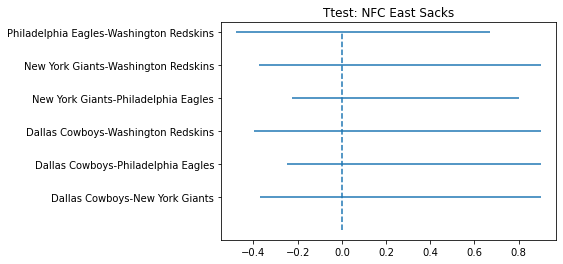

             Multiple Comparison of Means - Tukey HSD, FWER=0.05             
       group1              group2       meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------------------
     Dallas Cowboys     New York Giants   0.0046 0.7993 -0.0091 0.0184  False
     Dallas Cowboys Philadelphia Eagles     -0.0    0.9 -0.0134 0.0133  False
     Dallas Cowboys Washington Redskins   0.0043 0.8336 -0.0093 0.0179  False
    New York Giants Philadelphia Eagles  -0.0046  0.798 -0.0184 0.0091  False
    New York Giants Washington Redskins  -0.0004    0.9 -0.0143 0.0136  False
Philadelphia Eagles Washington Redskins   0.0043 0.8324 -0.0093 0.0179  False
-----------------------------------------------------------------------------


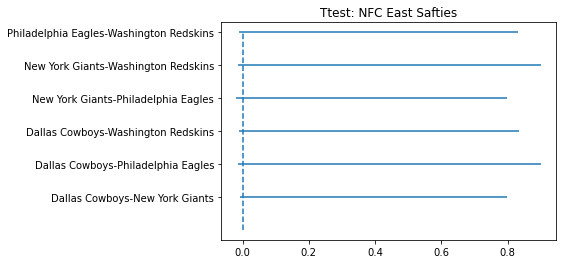

             Multiple Comparison of Means - Tukey HSD, FWER=0.05             
       group1              group2       meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------------------
     Dallas Cowboys     New York Giants   0.0415 0.8619    -0.1  0.183  False
     Dallas Cowboys Philadelphia Eagles   0.0535 0.7236 -0.0841 0.1912  False
     Dallas Cowboys Washington Redskins   0.0181    0.9  -0.122 0.1582  False
    New York Giants Philadelphia Eagles    0.012    0.9 -0.1294 0.1535  False
    New York Giants Washington Redskins  -0.0234    0.9 -0.1673 0.1205  False
Philadelphia Eagles Washington Redskins  -0.0355    0.9 -0.1755 0.1046  False
-----------------------------------------------------------------------------


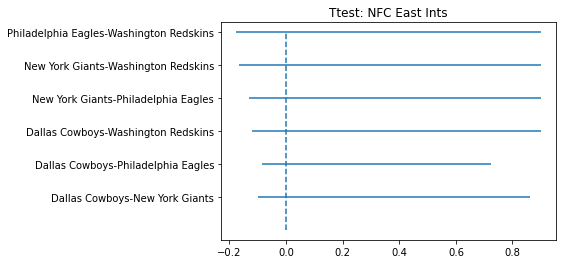